<a href="https://colab.research.google.com/github/nikhilcms/Find-Image-Resolution-using-CNN-Regressor/blob/master/cable_fault.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')ss

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/fiverr_data

/content/drive/My Drive/fiverr_data


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import cv2
import os
from PIL import Image

In [ ]:
faulty_cable = "/content/drive/My Drive/_data/Faulty_Cable" # data consist of all faulty cable
good_cable = "/content/drive/My Drive/_data/Good_Cable"

In [ ]:
faulty_cable_list = os.listdir(faulty_cable)
good_cable_list = os.listdir(good_cable)
print("Number of Faulty Cable: ",len(faulty_cable_list))
print("Number of Good Cable: ",len(good_cable_list))


Number of Faulty Cable:  85
Number of Good Cable:  224


In [ ]:
#=================Faulty Cables pictures================#

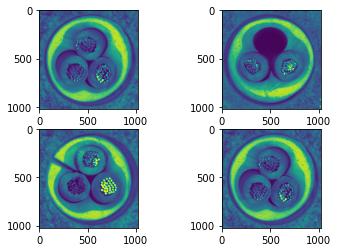

In [ ]:
f, axarr = plt.subplots(2,2)
image1 = cv2.imread(os.path.join(faulty_cable,faulty_cable_list[0]),0)
image2 = cv2.imread(os.path.join(faulty_cable,faulty_cable_list[28]),0)
image3 = cv2.imread(os.path.join(faulty_cable,faulty_cable_list[50]),0)
image4 = cv2.imread(os.path.join(faulty_cable,faulty_cable_list[80]),0)

axarr[0,0].imshow(image1)
axarr[0,1].imshow(image2)
axarr[1,0].imshow(image3)
axarr[1,1].imshow(image4)

image1 = cv2.imread(os.path.join(faulty_cable,faulty_cable_list[0]),0)
plt.imshow(image1)

In [ ]:
image1.shape

(1024, 1024)

In [ ]:
#==========Good Cable Pictures===============#

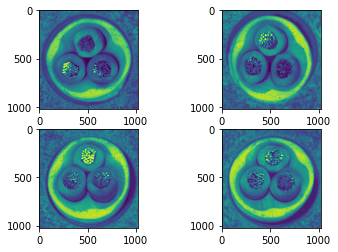

In [ ]:
f, axarr = plt.subplots(2,2)
image1 = cv2.imread(os.path.join(good_cable,good_cable_list[0]),0)
image2 = cv2.imread(os.path.join(good_cable,good_cable_list[28]),0)
image3 = cv2.imread(os.path.join(good_cable,good_cable_list[50]),0)
image4 = cv2.imread(os.path.join(good_cable,good_cable_list[80]),0)

axarr[0,0].imshow(image1)
axarr[0,1].imshow(image2)
axarr[1,0].imshow(image3)
axarr[1,1].imshow(image4)


In [ ]:
image1.shape

(1024, 1024)

In [ ]:
#================Image to array conversion (good cables)=================#
X1 = []
for indx,img in enumerate(good_cable_list):
  #image1 = cv2.imread(os.path.join(good_cable,good_cable_list[0]),0)
  img = Image.open(os.path.join(good_cable,img)).convert('L') # image extension *.png,*.jpg
  new_width  = 128                         # convert 1024*1024 images into 128*128 Image
  new_height = 128
  img = img.resize((new_width, new_height), Image.ANTIALIAS)
  image1 = np.array(img)
  image1 = image1 / 255                             # normalizing image
  image1 = np.asarray(image1).reshape(128,128)      # image to array conversion
  X1.append(image1.astype("float32"))

In [ ]:
#================Image to array conversion (faulty cables)=================#
X2 = []
for indx,img in enumerate(faulty_cable_list):
  img = Image.open(os.path.join(faulty_cable,img)).convert('L') # image extension *.png,*.jpg
  new_width  = 128                                    # convert 1024*1024 images into 128*128 Image
  new_height = 128
  img = img.resize((new_width, new_height), Image.ANTIALIAS)
  image1 = np.array(img)
  image1 = image1 / 255                               # normalizing image
  image1 = np.asarray(image1).reshape(128,128)         # image to array conversion
  X2.append(image1.astype("float32"))

In [ ]:
X3 = X1 + X2  # feature                   #combining all good and faulty  cables array
X3 = np.expand_dims(X3,-1)

In [ ]:
X3.shape

(309, 128, 128, 1)

In [ ]:
Y3 = [ 0 for i in good_cable_list ]  + [ 1 for i in faulty_cable_list ]   # combining all good and faulty array
Y3 = pd.DataFrame(Y3,columns = ["class"])

In [ ]:
from keras.utils.np_utils import to_categorical
Y3 = to_categorical(Y3, num_classes = 2)  #oneHhot encoding

In [ ]:
np.argmax(Y3,axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.model_selection import train_test_split         # train test split 80:20
x_train, x_val, y_train, y_val = train_test_split(X3,Y3,test_size = 0.20,random_state=42,stratify=Y3)

In [ ]:
#===============import all libraries================#
import keras
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization
from keras.optimizers import RMSprop
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import itertools

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout, concatenate, Input, Conv2D, MaxPooling2D
from keras.optimizers import Adam, Adadelta
from keras.layers.advanced_activations import LeakyReLU
from keras.utils.np_utils import to_categorical

In [ ]:
#-----------Archirtechture-----------------------------------#

def fire_incept(x, fire=16, intercept=64):
    x = Conv2D(fire, (5,5), strides=(2,2))(x)
    x = LeakyReLU(alpha=0.15)(x)
    
    left = Conv2D(intercept, (3,3), padding='same')(x)
    left = LeakyReLU(alpha=0.15)(left)
    
    right = Conv2D(intercept, (5,5), padding='same')(x)
    right = LeakyReLU(alpha=0.15)(right)
    
    x = concatenate([left, right], axis=3)
    return x

def fire_squeeze(x, fire=16, intercept=64):
    x = Conv2D(fire, (1,1))(x)
    x = LeakyReLU(alpha=0.15)(x)
    
    left = Conv2D(intercept, (1,1))(x)
    left = LeakyReLU(alpha=0.15)(left)
    
    right = Conv2D(intercept, (3,3), padding='same')(x)
    right = LeakyReLU(alpha=0.15)(right)
    
    x = concatenate([left, right], axis=3)
    return x

image_input=Input(shape=(128,128,1))

x = fire_incept((image_input), fire=16, intercept=16)

x = fire_incept(x, fire=32, intercept=32)
x = fire_squeeze(x, fire=32, intercept=32)

x = fire_incept(x, fire=64, intercept=64)
x = fire_squeeze(x, fire=64, intercept=64)

x = fire_incept(x, fire=64, intercept=64)
x = fire_squeeze(x, fire=64, intercept=64)

x = Conv2D(64, (3,3))(x)
x = LeakyReLU(alpha=0.1)(x)

x = Flatten()(x)

x = Dense(512)(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(0.1)(x)

out = Dense(2, activation='sigmoid')(x)

model_new = Model(image_input, out)
model_new.summary()


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 62, 62, 16)   416         input_2[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_24 (LeakyReLU)      (None, 62, 62, 16)   0           conv2d_23[0][0]                  
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 62, 62, 16)   2320        leaky_re_lu_24[0][0]             
____________________________________________________________________________________________

In [ ]:
#---------------Compiling model-----------------------------------------#

model_new.compile(optimizer = Adam(lr=.00015) , loss = 'binary_crossentropy', metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, 
                                            factor=0.5, min_lr=0.00001)

#---------------Data Augumentation---------------------------------------#

datagen = ImageDataGenerator(rotation_range=0, zoom_range = 0.2, width_shift_range=0.2, height_shift_range=0.2,
                             horizontal_flip=False, vertical_flip=False)

#--------------Fit model-------------------------------------------------#

datagen.fit(x_train)

#--------------------------Saving model weight--------------------------------#

#model_new.load_weights('model_weights_2.h5f')

batch_size = 24
epochs = 200

# Training
history = model_new.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size), epochs = epochs,
                                  validation_data = (x_val,y_val), verbose = 1, 
                                  steps_per_epoch=x_train.shape[0] // batch_size, 
                                  callbacks=[learning_rate_reduction])


Epoch 1/200
10/10 [==============================] - 2s 176ms/step - loss: 0.6756 - accuracy: 0.6794 - val_loss: 0.6006 - val_accuracy: 0.7258
Epoch 2/200
10/10 [==============================] - 1s 59ms/step - loss: 0.5873 - accuracy: 0.7220 - val_loss: 0.5981 - val_accuracy: 0.7258
Epoch 3/200
10/10 [==============================] - 1s 58ms/step - loss: 0.6000 - accuracy: 0.7175 - val_loss: 0.5828 - val_accuracy: 0.7258
Epoch 4/200
10/10 [==============================] - 1s 59ms/step - loss: 0.5613 - accuracy: 0.7444 - val_loss: 0.5931 - val_accuracy: 0.7258
Epoch 5/200
10/10 [==============================] - 1s 58ms/step - loss: 0.6065 - accuracy: 0.7040 - val_loss: 0.5890 - val_accuracy: 0.7258
Epoch 6/200
10/10 [==============================] - 1s 61ms/step - loss: 0.6095 - accuracy: 0.7042 - val_loss: 0.5884 - val_accuracy: 0.7258
Epoch 7/200
10/10 [==============================] - 1s 58ms/step - loss: 0.5755 - accuracy: 0.7399 - val_loss: 0.5814 - val_accuracy: 0.7258
Epoch

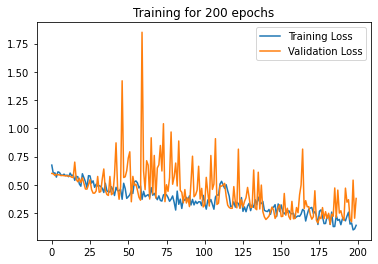

In [ ]:
#========loss vs no. of epochs graph======#
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training for ' +str(epochs)+ ' epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

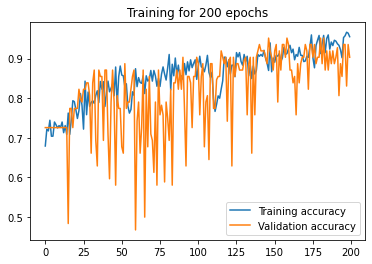

In [ ]:
#============accuracy vs epoch graph============#
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training for ' +str(epochs)+ ' epochs')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='lower right')
plt.show()


In [ ]:
#----------------------------CNN Evaluations------------------------------------------#
from sklearn.metrics import classification_report,accuracy_score
pred_prob=model_new.predict(x_val)  # predict validation set and compare with actual class
pred=np.argmax(pred_prob,axis=-1)
print(classification_report(pred,np.argmax(y_val,axis=1)))
print('Accuracy on Validation Set',accuracy_score(pred,np.argmax(y_val,axis=1)))


              precision    recall  f1-score   support

           0       0.96      0.91      0.93        47
           1       0.76      0.87      0.81        15

    accuracy                           0.90        62
   macro avg       0.86      0.89      0.87        62
weighted avg       0.91      0.90      0.91        62

Accuracy on Validation Set 0.9032258064516129


In [ ]:
model_new.save_weights("cnn_model.h5")

#loaded_model.load_weights("model.h5")   use this for loading model
#print("Loaded model from disk")

In [ ]:
#=========================Here we have to use machine learning model. we extract feature from cnn layes ( first dense layer in cnn architecture
#of size 512 (each example make 512 feature vector) In this way we will get all feature vector).read any feature extraction paper using cnn for more info
layr = []
for layer in model_new.layers:
    layr.append(layer.name)
layyr = layr[::-1][3]
layyr

'dense_3'

In [ ]:
#---------------Aplying SVM---------------------------------#

model_feat = Model(inputs=model_new.input,outputs=model_new.get_layer(layyr).output)  #  make a model for feature extraction

feat_train = model_feat.predict(x_train)    # calculate feature vector of x_train ( model already learn a features from x_train)
print(feat_train.shape)

feat_val = model_feat.predict(x_val)         # based on learning from x_train. model predict x_val features
print(feat_val.shape)

#feat_test = model_feat.predict(x_test)
#print(feat_test.shape)


from sklearn.svm import SVC

svm = SVC(kernel='rbf',gamma='auto')

svm.fit(feat_train,np.argmax(y_train,axis=1))      # fit svm model

print('fitting done !!!')

(247, 512)
(62, 512)
fitting done !!!


In [ ]:
#=======save model==========#

import pickle
file = "svm_model.sav"
pickle.dump(svm,open(file,"wb"))

In [ ]:
#----------------Training Score---------------#

print("Trainig SVC Accuracy",svm.score(feat_train,np.argmax(y_train,axis=1)))


Trainig SVC Accuracy 0.9271255060728745


In [ ]:
#---------------Validation Score---------------#

print("Validation SVC Accuracy",svm.score(feat_val,np.argmax(y_val,axis=1)))
pred=svm.predict(feat_val)
print(classification_report(pred,np.argmax(y_val,axis=1)))


Validation SVC Accuracy 0.9032258064516129
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        51
           1       0.65      1.00      0.79        11

    accuracy                           0.90        62
   macro avg       0.82      0.94      0.86        62
weighted avg       0.94      0.90      0.91        62



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, feat_val,np.argmax(y_val,axis=1),cv=5)    # cv accuracy
print("Cross_validation Accuracy using SVM: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_validation Accuracy using SVM: 0.90 (+/- 0.12)


In [ ]:
#-----------------` Applying GBOOST-----------------#
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(feat_train,np.argmax(y_train,axis=1)) # fit Gradiend boost model
print("Trainig XGBOOSt Accuracy",GB.score(feat_train,np.argmax(y_train,axis=1)))
print("Validation XGBOOST Accuracy",GB.score(feat_val,np.argmax(y_val,axis=1)))


Trainig XGBOOSt Accuracy 1.0
Validation XGBOOST Accuracy 0.8709677419354839


In [ ]:
#=======save model==========#

import pickle
file = "gboost_model.sav"
pickle.dump(GB,open(file,"wb"))

In [ ]:
from sklearn.model_selection import cross_val_score
GB=GradientBoostingClassifier()
scores = cross_val_score(GB, feat_val,np.argmax(y_val,axis=1),cv=5)   # cv accuracy
print("Cross_validation Accuracy using GradientBoostingClassifier: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_validation Accuracy using GradientBoostingClassifier: 0.86 (+/- 0.23)


In [ ]:
#------------------Applying Random Forest Classifier---------------#

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators = 500,criterion="entropy")
RF.fit(feat_train,np.argmax(y_train,axis=1))
print("Trainig Random Forest Accuracy",RF.score(feat_train,np.argmax(y_train,axis=1)))

print("Validation Random Forest Accuracy",RF.score(feat_val,np.argmax(y_val,axis=1)))

Trainig Random Forest Accuracy 1.0
Validation Random Forest Accuracy 0.9193548387096774


In [ ]:
#=======save model==========#

import pickle
file = "rf_model.sav"
pickle.dump(RF,open(file,"wb"))

In [ ]:
from sklearn.model_selection import cross_val_score
RF=RandomForestClassifier(n_estimators = 500,criterion="entropy")
scores = cross_val_score(RF, feat_val,np.argmax(y_val,axis=1),cv=5)       # cv accuracy
print("Cross_validation Accuracy using RandomForestClassifier: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_validation Accuracy using RandomForestClassifier: 0.87 (+/- 0.19)


In [ ]:
#-----------------` Applying xg boost model-----------------#
import xgboost as xgb
xb = xgb.XGBClassifier()
xb.fit(feat_train,np.argmax(y_train,axis=1))
print('fitting done !!!')

fitting done !!!


In [ ]:
#=======save model==========#

import pickle
file = "xgboost_model.sav"
pickle.dump(xb,open(file,"wb"))

In [ ]:
print("Trainig xgboost Accuracy",xb.score(feat_train,np.argmax(y_train,axis=1)))
print("Validation xgboost Accuracy",xb.score(feat_val,np.argmax(y_val,axis=1)))

Trainig xgboost Accuracy 1.0
Validation xgboost Accuracy 0.9032258064516129


In [ ]:
scores = cross_val_score(xb,feat_val,np.argmax(y_val,axis=1),cv=5)      # cv five fold accuracy
print("Cross_validation Accuracy using XGBClassifier: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_validation Accuracy using XGBClassifier: 0.86 (+/- 0.12)


In [ ]:
#yo can use any classifier for prediction

In [ ]:
img1 = Image.open(os.path.join(good_cable,good_cable_list[0])).convert('L') # image extension *.png,*.jpg # change thsi line for other example prediction
new_width  = 128                     # change image and pass to this code
new_height = 128
img1 = img1.resize((new_width, new_height), Image.ANTIALIAS)
image2 = np.array(img1)
image12 = image2 / 255
image2 = np.asarray(image2).reshape(128,128)
X_New = np.expand_dims(image2,-1)
X_New = np.expand_dims(X_New,0)


In [ ]:
loaded_model = pickle.load(open("xgboost_model.sav","rb"))           # you can change any model as u wish

In [ ]:
feat_val1 = model_feat.predict(X_New)   # 0 == Good cable and 1 == Faulty Cable
pred = loaded_model.predict(feat_val1)
if pred[0] == 0:
  print("Given Example is Good Cable")
else:
  print("Given Example is  Cable")

Given Example is Good Cable
